## 1. Введение.
---------------

#### 1.1. Примеры применения методов ML в жизни:
- спам-фильтр;
- предотвращение поломок оборуднования;
- разведка новых месторождений;
- прогнозирование спроса и автоматизация закупок;
- оптимизация маршрута.

#### 1.2. Классификация.
||Задача|Класс задачи|
|-|---------|------------------------------------|
|1|Предсказать цену дома|Регрессия|
|2|Спрогнозируйте, вернет ли клиент кредит|Регрессия, Классификация|
|3|Предсказать, когда пациенту необходимо принять лекарство|Регрессия|
|4|Выберите, какое лекарство из доступных принять пациенту|Классификация|
|5|Выберите сегмент клиентов для промо-коммуникации|Классификация|
|6|Распознавание бракованной продукции на производственной линии (по сканам фотографий)|Классификация|
|7|Решите, как разместить товары на полке в магазине.|Регрессия|
|8|Поиск сайтов по вводу текстового запроса|Ассоциация|
|9|Разделите клиентов магазина на сегменты, чтобы понять различия в их поведении.|Кластеризация|
|10|Обнаружение аномалий в трафике сайта|Регрессия, Классификация|
|11|Спам-фильтр|Классификация|
|12|Предотвращение поломок оборуднования|Регрессия, Классификация|
|13|Разведка новых месторождений|Регрессия|
|14|Прогнозирование спроса и автоматизация закупок|Регрессия|
|15|Оптимизация маршрута|Регрессия|

#### 1.3. Multiclass и Multi-Label.
Multiclass - это проблемма классификации в один из трех или более возможных классов.

Multi-Label - это проблема классификации, когда экземпляр может принадлежать одновременно нескольким классам(например, классификации книги, которая может быть одновременно и фантастикой и романом).

#### 1.4. Регрессия и классификация.
Задачу регрессии можно свести к задаче классификации. На примере задачи стоимости жилья мы можем представить диапозон цен и опрделить их категориально (дешевое жильне, жилье средней стоимости, дорогое жилье).

## 2. Введение в анализ данных.
-------------------------------

#### 2.1. Импорт библиотек.

In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'F:\Project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd, seaborn as sns
#import lightgbm, scipy, statsmodels, matplotlib, seaborn, numpy, sklearn

C:\Users\Legi0n\AppData\Local\Temp\ipykernel_14044\2326341081.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, seaborn as sns


#### 2.2. Загрузка данных.

In [3]:
data_train_full = pd.read_json('data/train.json')
data_test_full = pd.read_json('data/test.json')

#### 2.3. Размер данных.

In [4]:
data_train_full.size

740280

In [5]:
data_train_full.shape

(49352, 15)

#### 2.4. Вывод столбцов.

In [6]:
data_train_full.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

Целевым столбоц в рамках поставленной задачи является столбец 'price' содержащий стоимость помещения.

#### 2.5. Быстрый анализ данных.

Функция `info()` выводит информацию о датафрейме. Из данной ифнормации можно сделать вывод что датафрейм состоит из 15 колонок и 49352 строк, так же мы видим тип данных для каждой метки и можем определить есть ли пустые поля в значениях(в данном наборе пропуски отсутствуют).

In [7]:
data_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Функция `describe()` выводит статистическую информацию о числовых столбцах такую как: колличество(count), среднее значение(mean), стандартное отклонение(std), минимальное и максимальное значение(min и max соответственно) и процентили(25%, 50%, 75%). 

In [8]:
data_train_full.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Функция `corr()` выводит попарную корреляцию(зависимость) значений.

In [9]:
data_train_full.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


#### 2.6. Фрейм.

In [10]:
df = data_train_full.loc[:, ('bathrooms', 'bedrooms', 'interest_level', 'price')]
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


## 3. Статистический анализ данных.
-----------------------------------

#### 3.1. Определения.

##### 3.1.1. Статистические значения.

__*Среднее значение*__ - некоторое число расположенное между минимальным и максимальным значением множества.

__*Медиана*__ - число, которое находится в середине множества. Половина чисел не больше этого числа, но другая половина чисел не меньше этого числа.

Примеры ниже наглядно демонстрируют разницу между `средним значением` и `медианой`.

In [11]:
test = pd.Series([3, 5, 5, 9, 11])
print(test.mean())
print(test.median())

6.6
5.0


In [12]:
test = pd.Series([3, 5, 9, 11])
print(test.mean())
print(test.median())

7.0
7.0


__*Мода*__ - одно или несколько значений множества, которое встречается наиболее часто.

In [13]:
test = pd.Series([6, 2, 6, 6, 8, 9, 9, 9, 0])
print(test.mode())

0    6
1    9
dtype: int64


__*Дисперсия*__ - это мера, которая показывает разброс между значениями. Если все они близки к среднему, дисперсия низкая. А если результаты сильно различаются — высокая.

__*Стандартное отклонение*__ - квадратный корень из дисперсии.

In [14]:
test = pd.Series([6, 2, 6, 6, 8, 9, 9, 9, 0])
my_mean = (
    (
        test - test.mean()
    ) ** 2
).mean()
print(my_mean)
print(my_mean ** 0.5)
print(test.var(ddof=0))
print(test.std(ddof=0))

9.209876543209877
3.034777840832814
9.209876543209877
3.034777840832814


__*Выбросы*__ - результат измерения, выделяющийся из общей выборки.

__*Процентили*__ - это значение, которое заданная случайная величина не превышает с фиксированной вероятностью, заданной в процентах. Квантиль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем.
- 0,25-квантиль называется первым (или нижним) квартилем (от лат. quarta — четверть);
- 0,5-квантиль называется медианой (от лат. mediāna — середина) или вторым квартилем;
- 0,75-квантиль называется третьим (или верхним) квартилем.

__*Доверительный интервал*__ - это приблизительный диапазон значений, который с высокой степенью вероятности включает все данные.

##### 3.1.2. Распределения.

**Дискретное равномерное распределение.**

Случайная величина имеет дискретное равномерное распределение, если она принимает конечное число n значений с равными вероятностями, соответственно, вероятность каждого значения равна 1/n.

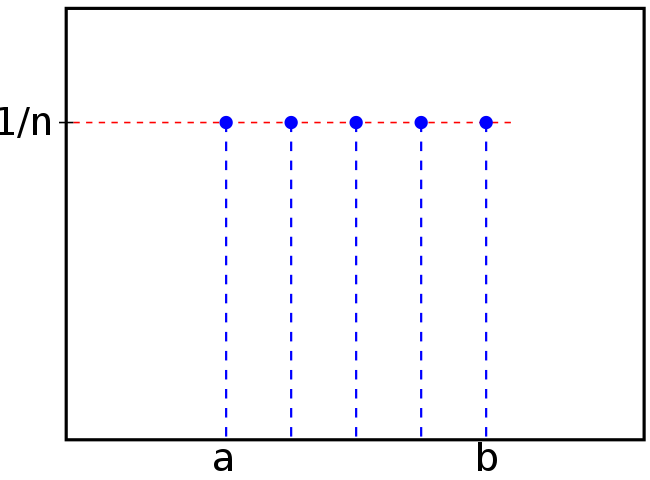

**Распределение Бернулли.**

Случайная величина X имеет распределение Бернулли, если она принимает всего два значения: 1 и 0 с вероятностями p и 1-p соответственно.

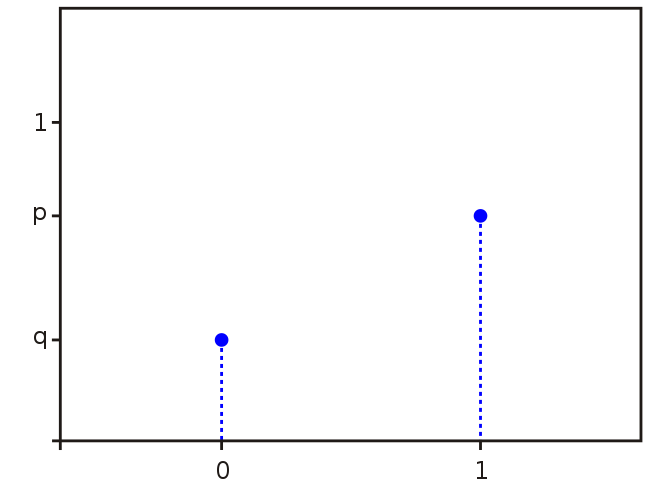

**Биномиальное распределение.**

Распределение количества «успехов» в последовательности из n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.

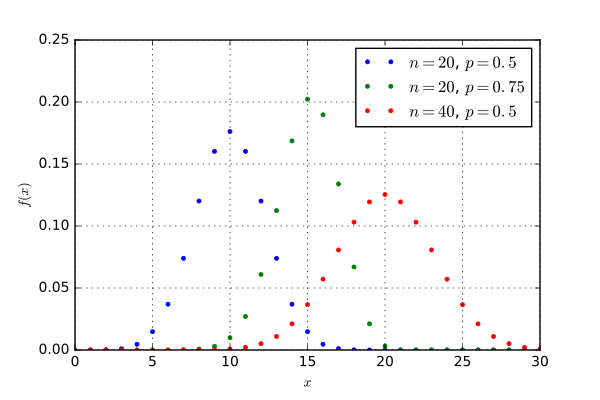

**Распределение Пуассона.**

Распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

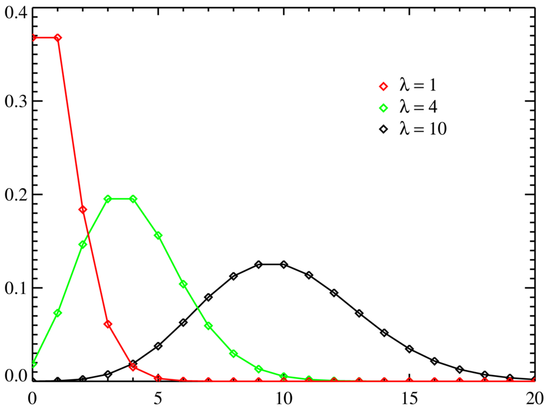

**Нормальное распределение.**

Значения случайной величины будут сгруппированы вокруг среднего значения, и чем дальше от среднего значения, тем меньше вероятность того, что такое значение появится.

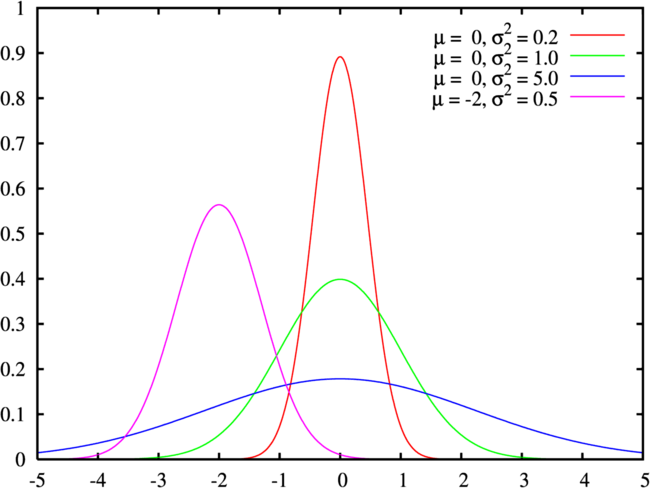

**Экспоненциальное распределение.**

Абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

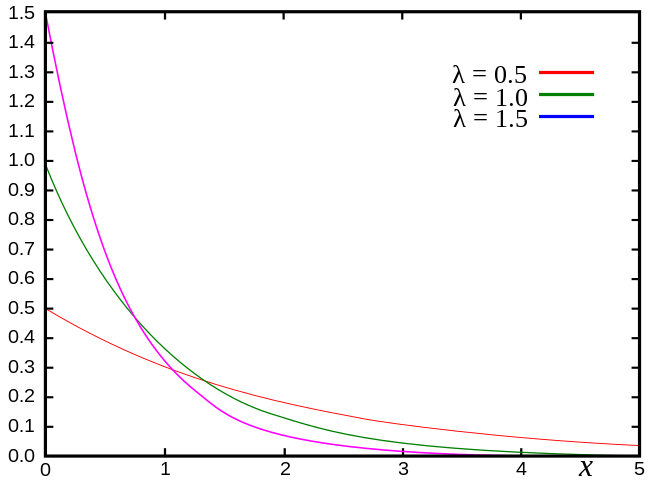

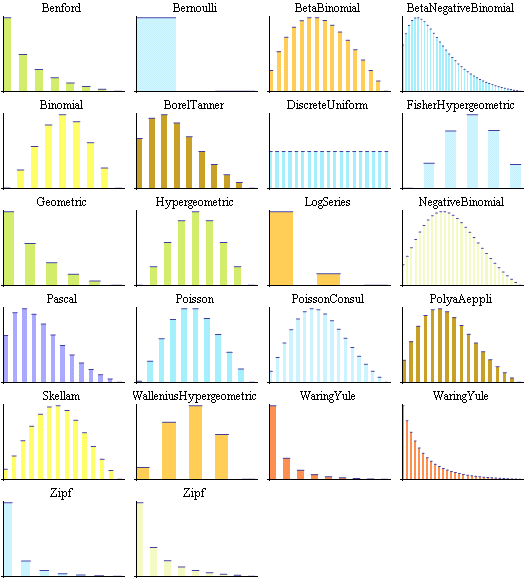

#### 3.2. Полезная статья.
[Статья](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf)

#### 3.3. Целевой анализ.

##### 3.3.1. Гистограмма.

Гистограмма имеет плохое распределенеие, скорее всего в данных есть какие-то ошибки или выбросы.

<Axes: ylabel='Frequency'>

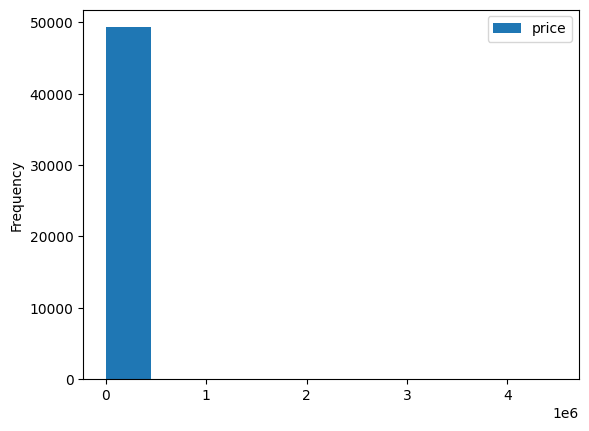

In [15]:
df.plot.hist(column='price')

##### 3.3.2. Boxplot()

График ниже показывает нам, что большинство значений сосредоточенно в нижней части, есть несколько знаений расположенных у величены в 1000000 и одно значение расположенное у величены в 5000000. Эти отдельные значения аномальны являются выбросами (ошибками).

<Axes: >

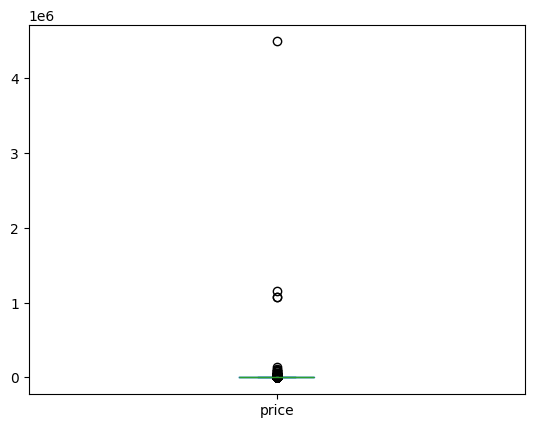

In [16]:
df.plot.box(column='price')

##### 3.3.3. Удаление выбросов.

In [17]:
df_without_outliers = df.loc[(df.price > df.price.quantile(0.01)) & (df.price < df.price.quantile(0.99))]

##### 3.3.4. Гистограмма без выбросов

<Axes: ylabel='Frequency'>

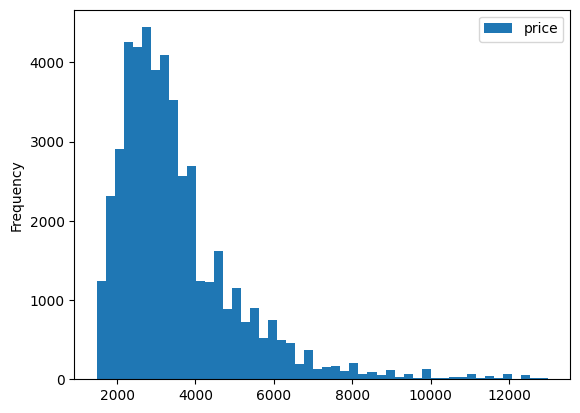

In [18]:
df_without_outliers.plot.hist(column='price', bins=50)

<Axes: >

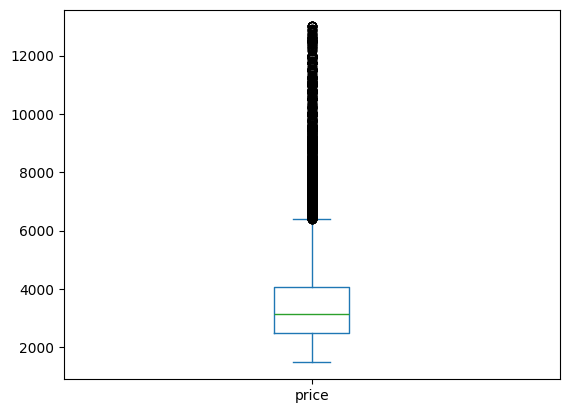

In [19]:
df_without_outliers.plot.box(column='price')

#### 3.4. Анализ особенностей.

##### 3.4.1. Тип столбца `interest_level` - Object

In [20]:
df_without_outliers.interest_level.dtype

dtype('O')

##### 3.4.2. Вывод значений столбца `interest_level`

In [21]:
df_without_outliers.interest_level

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 48343, dtype: object

In [22]:
df_without_outliers.interest_level.unique()

array(['medium', 'low', 'high'], dtype=object)

##### 3.4.3. Декодирование

In [23]:
df_without_outliers.loc[:,'interest_level'] = df_without_outliers.loc[:,'interest_level'].replace(df_without_outliers.loc[:,'interest_level'].unique(), [1, 0, 2]).infer_objects()

C:\Users\Legi0n\AppData\Local\Temp\ipykernel_14044\4198937183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_without_outliers.loc[:,'interest_level'] = df_without_outliers.loc[:,'interest_level'].replace(df_without_outliers.loc[:,'interest_level'].unique(), [1, 0, 2]).infer_objects()


##### 3.4.4. Гистограмма.

<Axes: ylabel='Frequency'>

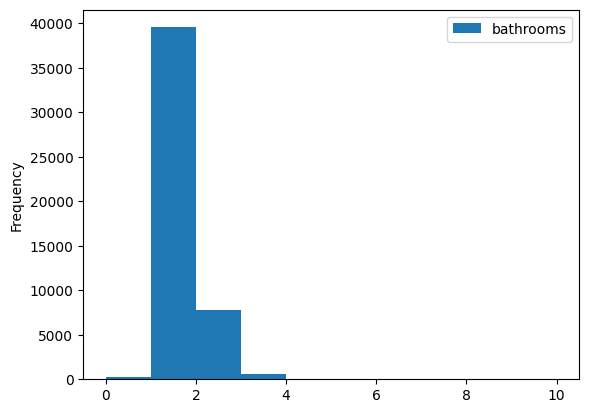

In [24]:
df_without_outliers.plot.hist(column='bathrooms')

<Axes: ylabel='Frequency'>

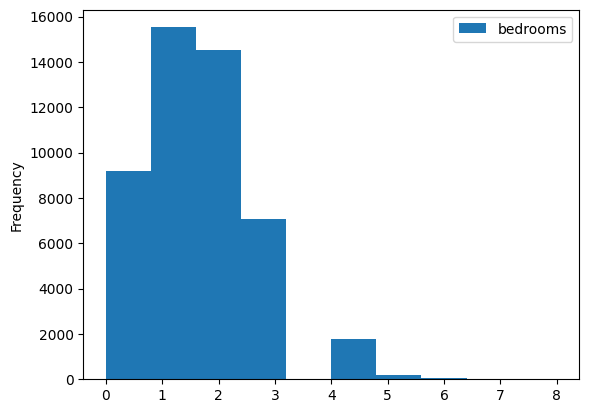

In [25]:
df_without_outliers.plot.hist(column='bedrooms')

<Axes: >

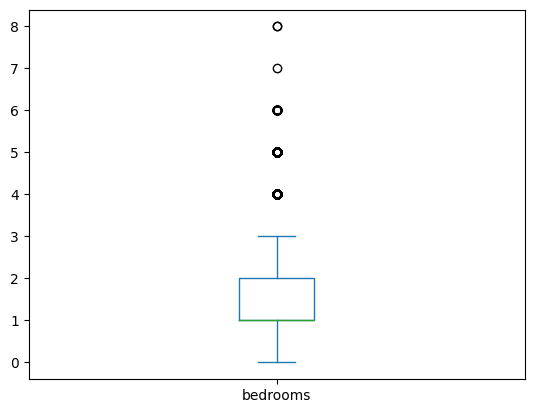

In [26]:
df_without_outliers.plot.box(column='bedrooms')

<Axes: >

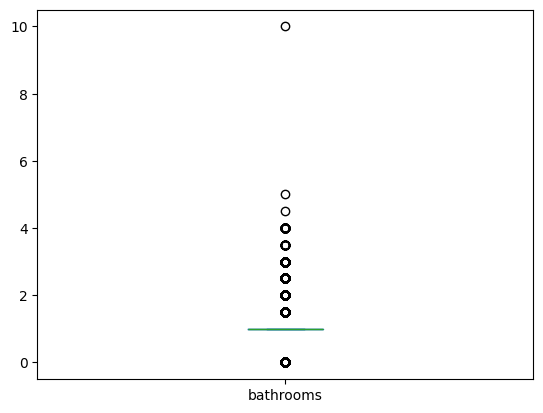

In [27]:
df_without_outliers.plot.box(column='bathrooms')

По графикам сложно сказать однозначно о наличии выбрасов. Есть значения при построении графика по столбцу "bathrooms", которые я бы отнес к выбросам.

#### 3.5. Комплексный анализ.

##### 3.5.1. Корреляция и heatmap

In [28]:
df_without_outliers.corr()

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


<Axes: >

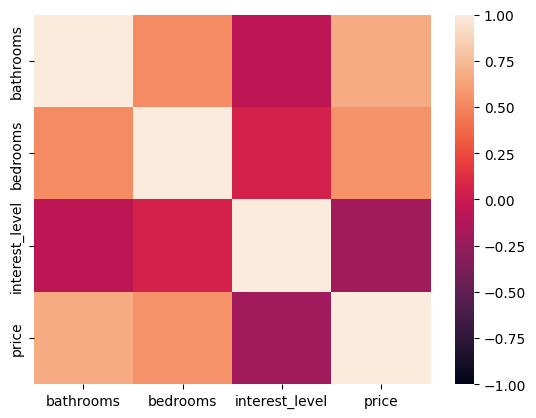

In [29]:
sns.heatmap(df_without_outliers.corr(), vmin=-1.0, vmax=1.0)

По данным видно что для `price` существует средняя положительная корреляция с полями `bathrooms` и `bedrooms` и слабая отрицательная корреляция с полем `interest_level`.

##### 3.5.2. Scatter plot

<Axes: xlabel='price', ylabel='bathrooms'>

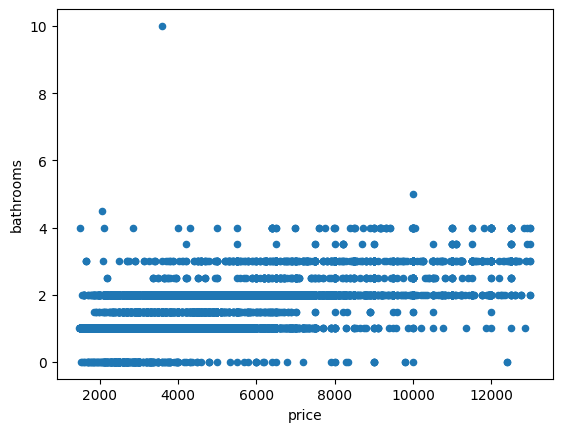

In [30]:
df_without_outliers.plot(x='price', y='bathrooms', kind='scatter')

<Axes: xlabel='price', ylabel='bedrooms'>

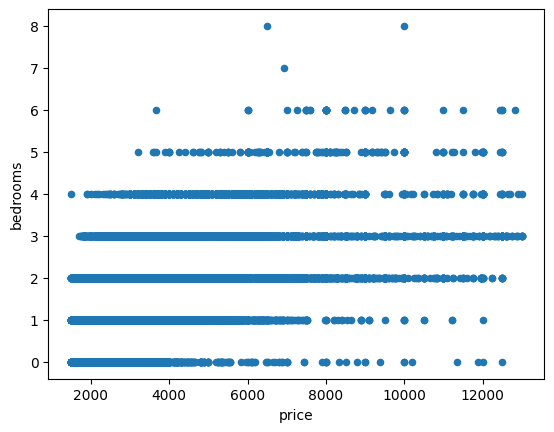

In [31]:
df_without_outliers.plot(x='price', y='bedrooms', kind='scatter')

<Axes: xlabel='price', ylabel='interest_level'>

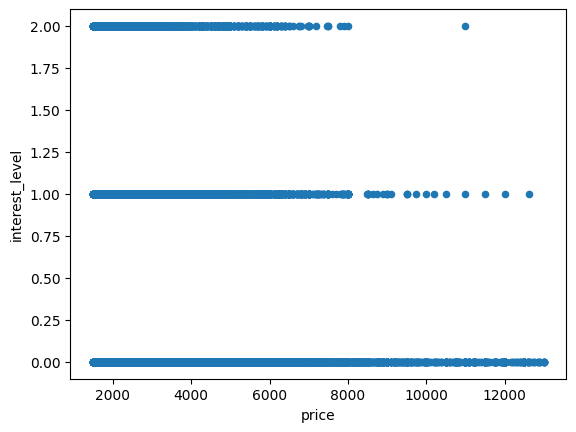

In [32]:
df_without_outliers.plot(x='price', y='interest_level', kind='scatter')

## 4. Генерация фичей.

In [33]:
my_features_df = df_without_outliers.copy()

In [34]:
my_features_df.insert(0 , 'sq_bathrooms', df_without_outliers.bathrooms**2)

In [35]:
my_features_df.insert(0 , 'sq_bedrooms', df_without_outliers.bedrooms**2)

In [36]:
my_features_df.insert(0 , 'sq_interest_level', df_without_outliers.interest_level**2)

In [37]:
my_features_df.insert(0 , 'diff_rooms', df_without_outliers.bedrooms - df_without_outliers.bathrooms)

In [38]:
my_features_df.insert(0 , 'sum_rooms', df_without_outliers.bedrooms + df_without_outliers.bathrooms)

In [39]:
my_features_df.head()

,sum_rooms,diff_rooms,sq_interest_level,sq_bedrooms,sq_bathrooms,bathrooms,bedrooms,interest_level,price
4,2.0,0.0,1,1,1.00,1.0,1,1,2400
6,3.0,1.0,0,4,1.00,1.0,2,0,3800
9,3.0,1.0,1,4,1.00,1.0,2,1,3495
10,4.5,1.5,1,9,2.25,1.5,3,1,3000
15,1.0,-1.0,0,0,1.00,1.0,0,0,2795


In [40]:
my_features_df.corr()

,sum_rooms,diff_rooms,sq_interest_level,sq_bedrooms,sq_bathrooms,bathrooms,bedrooms,interest_level,price
sum_rooms,1.000000,0.760350,0.012526,0.913506,0.691105,0.736136,0.960007,0.020005,0.652261
diff_rooms,0.760350,1.000000,0.074713,0.813616,0.096372,0.120109,0.911789,0.089627,0.312987
sq_interest_level,0.012526,0.074713,1.000000,0.036408,-0.061563,-0.058710,0.040125,0.943959,-0.182283
sq_bedrooms,0.913506,0.813616,0.036408,1.000000,0.521951,0.548426,0.928282,0.047048,0.544612
sq_bathrooms,0.691105,0.096372,-0.061563,0.521951,1.000000,0.955906,0.478497,-0.067757,0.646949
bathrooms,0.736136,0.120109,-0.058710,0.548426,0.955906,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.960007,0.911789,0.040125,0.928282,0.478497,0.517200,1.000000,0.051282,0.547310
interest_level,0.020005,0.089627,0.943959,0.047048,-0.067757,-0.062819,0.051282,1.000000,-0.199652
price,0.652261,0.312987,-0.182283,0.544612,0.646949,0.670808,0.547310,-0.199652,1.000000


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(10)

In [43]:
poly.fit(df_without_outliers.loc[:, ('bathrooms', 'bedrooms')])

PolynomialFeatures(degree=10)

In [44]:
poly_data_train = poly.transform(df_without_outliers.loc[:, ('bathrooms', 'bedrooms')])

In [46]:
poly_data_test = poly.transform(data_test_full.loc[:, ('bathrooms', 'bedrooms')])

## 5. Обучение моделей.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as MAE

In [48]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

#### 5.1. Подготовка `train` данных.

In [49]:
data_train = data_train_full.loc[:, ('bathrooms', 'bedrooms', 'latitude', 'longitude', 'price')]
data_train.corr()

,bathrooms,bedrooms,latitude,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,-0.966807,-0.000707
longitude,0.010393,0.006892,-0.966807,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,-0.000087,1.000000


array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

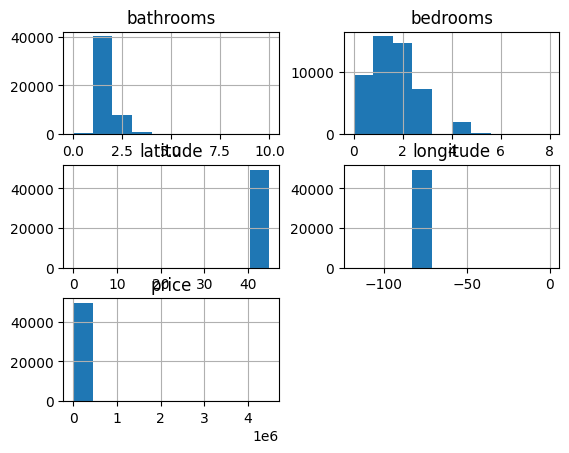

In [50]:
data_train.hist()

<Axes: >

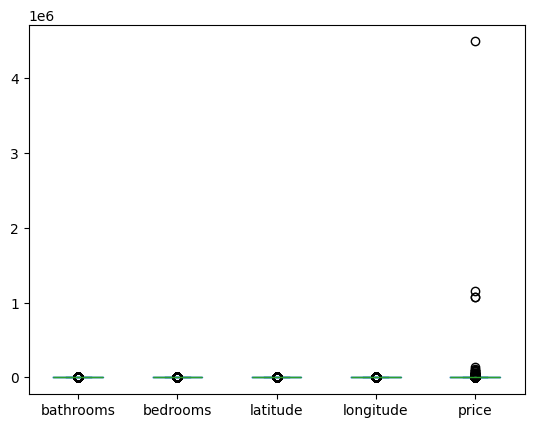

In [51]:
data_train.plot.box()

In [52]:
data_train_without_outliers = data_train.loc[(data_train.price > data_train.price.quantile(0.01)) & (data_train.price < data_train.price.quantile(0.99))]
train = data_train_without_outliers.loc[:, ('bathrooms', 'bedrooms', 'latitude', 'longitude')]
target_train = data_train_without_outliers.loc[:, 'price']

In [53]:
data_train_without_outliers.corr()

,bathrooms,bedrooms,latitude,longitude,price
bathrooms,1.000000,0.517200,-0.004722,0.005735,0.670808
bedrooms,0.517200,1.000000,-0.003407,0.006489,0.547310
latitude,-0.004722,-0.003407,1.000000,-0.965364,-0.003692
longitude,0.005735,0.006489,-0.965364,1.000000,-0.005082
price,0.670808,0.547310,-0.003692,-0.005082,1.000000


array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

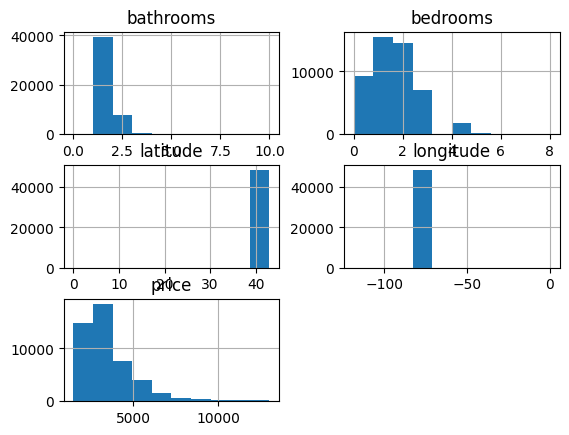

In [54]:
data_train_without_outliers.hist()

<Axes: >

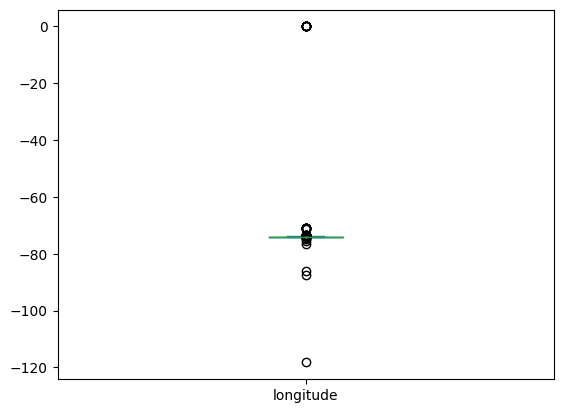

In [55]:
data_train_without_outliers.plot.box(column='longitude')

#### 5.2. Подготовка `test` данных.

In [56]:
data_test = data_test_full.loc[:, ('bathrooms', 'bedrooms', 'latitude', 'longitude', 'price')]
data_test.corr()

,bathrooms,bedrooms,latitude,longitude,price
bathrooms,1.000000,0.413391,0.004212,-0.004216,0.122573
bedrooms,0.413391,1.000000,-0.002787,0.003012,0.111072
latitude,0.004212,-0.002787,1.000000,-0.965014,0.001478
longitude,-0.004216,0.003012,-0.965014,1.000000,-0.002307
price,0.122573,0.111072,0.001478,-0.002307,1.000000


array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

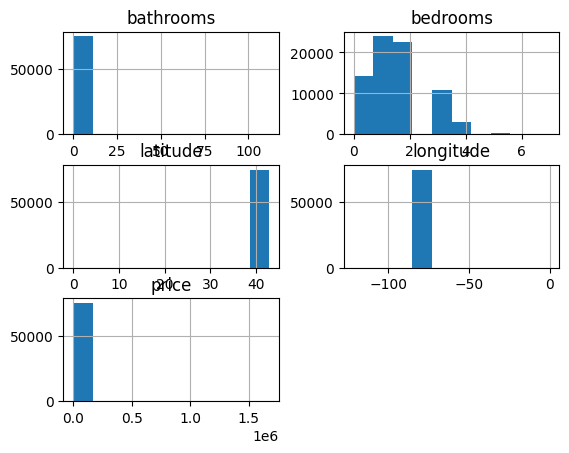

In [57]:
data_test.hist()

<Axes: >

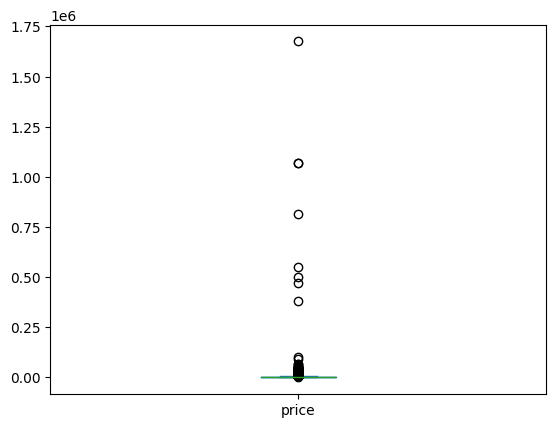

In [58]:
data_test.plot.box(column='price')

In [59]:
data_test_without_outliers = data_test.loc[(data_test.price > data_test.price.quantile(0.01)) & (data_test.price < data_test.price.quantile(0.99))]
test = data_test_without_outliers.loc[:, ('bathrooms', 'bedrooms', 'latitude', 'longitude')]
target_test = data_test_without_outliers.loc[:, 'price']

In [60]:
data_test_without_outliers.corr()

,bathrooms,bedrooms,latitude,longitude,price
bathrooms,1.000000,0.382573,0.003854,-0.003046,0.491948
bedrooms,0.382573,1.000000,-0.003258,0.004281,0.540907
latitude,0.003854,-0.003258,1.000000,-0.969590,0.004083
longitude,-0.003046,0.004281,-0.969590,1.000000,-0.010935
price,0.491948,0.540907,0.004083,-0.010935,1.000000


array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

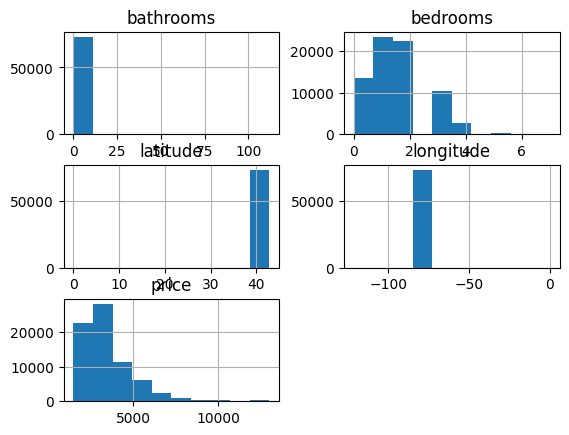

In [61]:
data_test_without_outliers.hist()

<Axes: >

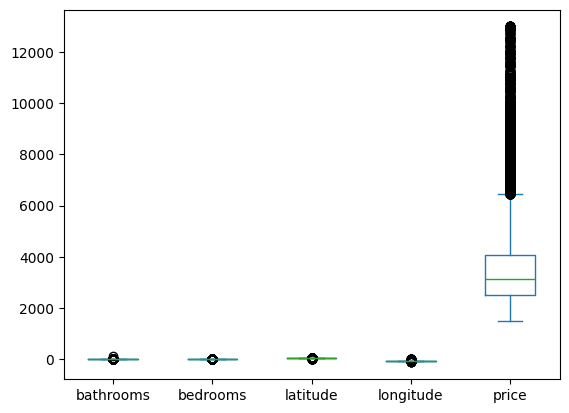

In [62]:
data_test_without_outliers.plot.box()

In [63]:
poly_train = poly.fit_transform(train)
poly_test = poly.transform(test)

#### 5.3. Линейная регрессия.

In [64]:
liner_model = LinearRegression().fit(poly_train, target_train)
predict_train = liner_model.predict(poly_train)
predict_test = liner_model.predict(poly_test)

In [65]:
MAE(target_train, predict_train)

609.8172231903152

In [66]:
MAE(target_test, predict_test)

41443091381677.29

#### 5.4. Дерево решений.

In [67]:
tree_model = DecisionTreeRegressor(random_state=42).fit(poly_train, target_train)
predict_train = tree_model.predict(poly_train)
predict_test = tree_model.predict(poly_test)

In [68]:
MAE(target_train, predict_train)

148.15387084673324

In [69]:
MAE(target_test, predict_test)

318.9979763902177